<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Lotka_Volterra_em_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de EDO (Lotka-Volterra) em ACP

$$\frac{dx}{dt} = αx - βxy$$
$$\frac{dy}{dt} = δxy - γy$$

Em que:
- $x$: população de presas
- $y$: população de predadores
- $α$: taxa de crescimento das presas
- $β$: taxa de predação
- $δ$: taxa de crescimento dos predadores devido à predação
- $γ$: taxa de mortalidade dos predadores

<br>

ACP, em uma grade $100 \times 100$. Simulações de $1000$ iterações para valores de $\beta = [0.01, 0.1, 0.5]$ e demais valores fixos ($α, γ = 0.1$, $δ = 0.01$).

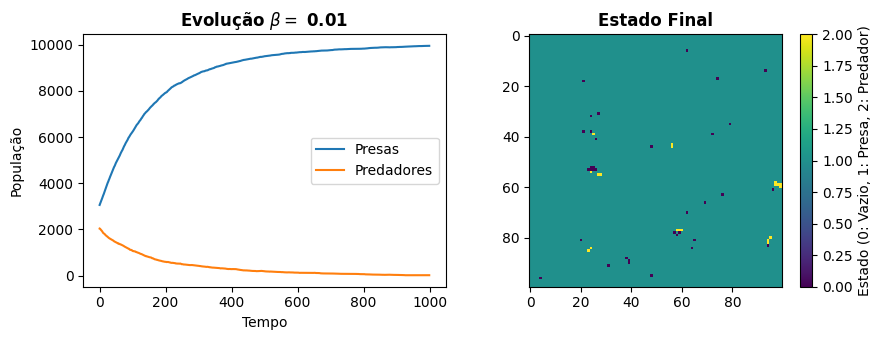

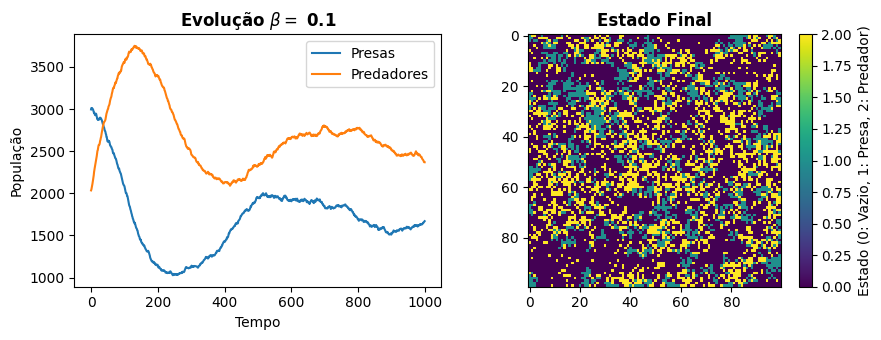

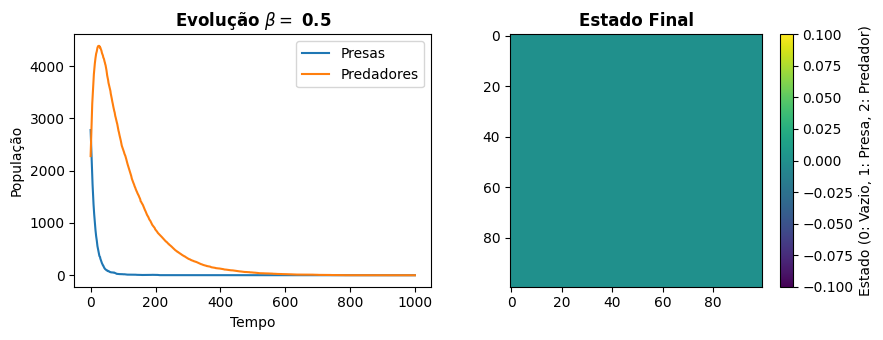

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
alpha = 0.1  # taxa de crescimento das presas
beta = 0.1  # taxa de predação
delta = 0.01  # taxa de crescimento dos predadores devido à predação
gamma = 0.1  # taxa de mortalidade dos predadores
dt = 0.1  # passo de tempo

for beta in [0.01, 0.1, 0.5]:
  # Tamanho da grade
  n = 100

  # Inicialização da grade
  grid = np.random.choice([0, 1, 2], size=(n, n), p=[0.5, 0.3, 0.2])

  # Função para contar vizinhos
  def count_neighbors(arr, i, j, value):
      return np.sum(arr[max(0,i-1):min(n,i+2), max(0,j-1):min(n,j+2)] == value) - (arr[i,j] == value)

  # Função para atualizar a grade
  def update():
      global grid
      new_grid = grid.copy()

      for i in range(n):
          for j in range(n):
              if grid[i,j] == 0:  # Célula vazia
                  if count_neighbors(grid, i, j, 1) > 0 and np.random.random() < alpha * dt:
                      new_grid[i,j] = 1
              elif grid[i,j] == 1:  # Presa
                  num_predators = count_neighbors(grid, i, j, 2)
                  if np.random.random() < beta * dt * num_predators:
                      new_grid[i,j] = 2
              else:  # Predador
                  if np.random.random() < gamma * dt:
                      new_grid[i,j] = 0

      grid = new_grid

  # Simulação e coleta de dados
  num_updates = 1000
  prey_pop = []
  predator_pop = []

  for _ in range(num_updates):
      update()
      prey_pop.append(np.sum(grid == 1))
      predator_pop.append(np.sum(grid == 2))

  # Plotagem dos resultados
  plt.figure(figsize=(9, 3.5))


  # Plot da evolução das populações
  plt.subplot(1, 2, 1)
  plt.plot(range(num_updates), prey_pop, label='Presas')
  plt.plot(range(num_updates), predator_pop, label='Predadores')
  plt.xlabel('Tempo')
  plt.ylabel('População')
  plt.title(f'Evolução $\\beta = $ {beta}',weight='bold')
  plt.legend()

  # Plot da grade final
  plt.subplot(1, 2, 2)
  plt.imshow(grid, cmap='viridis', interpolation='nearest')
  plt.title('Estado Final',weight='bold')
  plt.colorbar(label='Estado (0: Vazio, 1: Presa, 2: Predador)')

  plt.tight_layout()
  plt.show()
